In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("whitegrid")

# AAPL Close Price with MA20 and MA200

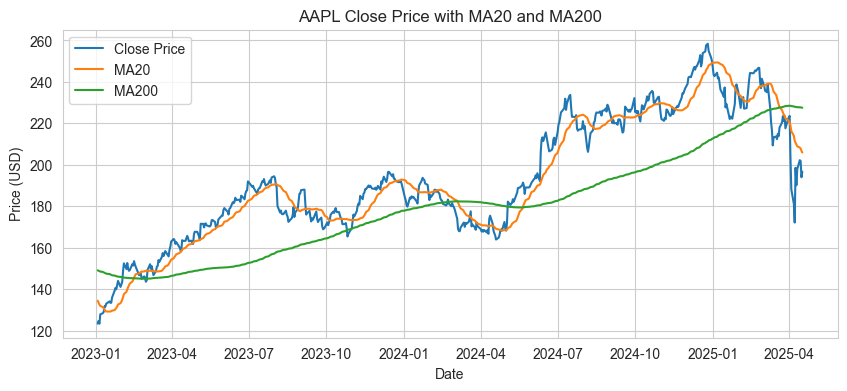

In [5]:
final_df = pd.read_csv('stocks_data_full.csv')
final_df['Date'] = pd.to_datetime(final_df['Date'])

aapl_df = final_df[final_df['Ticker'] == 'AAPL']

plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['Date'], aapl_df['MA20'], label='MA20')
plt.plot(aapl_df['Date'], aapl_df['MA200'], label='MA200')
plt.title('AAPL Close Price with MA20 and MA200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

This plot shows the daily closing price of AAPL stock along with its 20-day and 200-day moving averages.  
It helps visualize both short-term and long-term trends in the stock's price movement.

# AAPL RSI (Relative Strength Index) Over Time

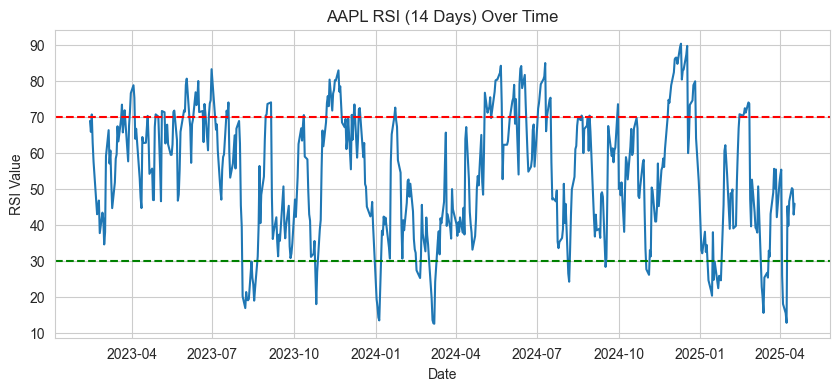

In [6]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df[28:], x='Date', y='RSI_14')
plt.title('AAPL RSI (14 Days) Over Time')
plt.axhline(70, color='red', linestyle='--')  #Overbought line
plt.axhline(30, color='green', linestyle='--')  #Oversold line
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.grid(True)
plt.show()

This chart displays the 14-day RSI values for AAPL.  
It indicates momentum and highlights periods where the stock may be overbought (RSI > 70) or oversold (RSI < 30).


# AAPL ATR (Average True Range) Over Time

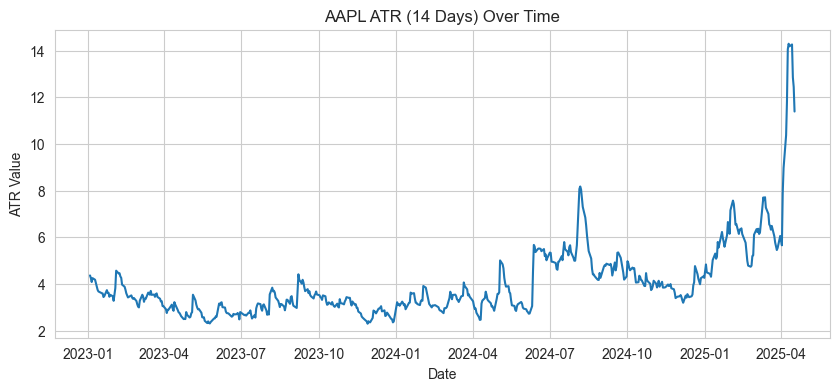

In [7]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df, x='Date', y='ATR_14')
plt.title('AAPL ATR (14 Days) Over Time')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.grid(True)
plt.show()

This plot shows the 14-day Average True Range (ATR) for AAPL.  
It measures the stock's daily volatility and helps assess the level of price fluctuations over time.

# Distribution of P/E Ratios Across Companies

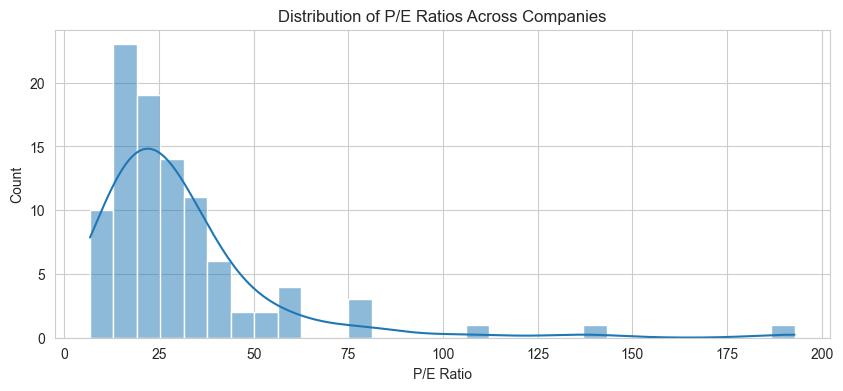

In [8]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['P/E'], bins=30, kde=True)
plt.title('Distribution of P/E Ratios Across Companies')
plt.xlabel('P/E Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This histogram illustrates the distribution of Price-to-Earnings (P/E) ratios across different companies.  
It helps identify how companies are valued relative to their earnings.


# Distribution of Market Capitalization Across Companies

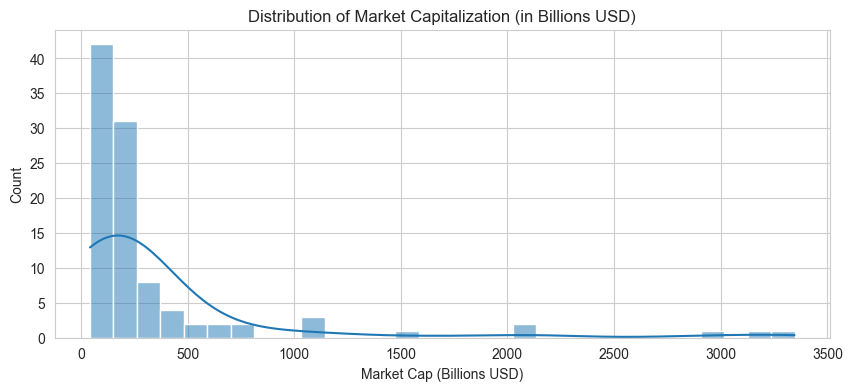

In [9]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['Market_Cap']/1e9, bins=30, kde=True)
plt.title('Distribution of Market Capitalization (in Billions USD)')
plt.xlabel('Market Cap (Billions USD)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This plot shows the spread of companies by their total market value (in billions of USD).  
It highlights the presence of small, mid-sized, and large-cap stocks in the dataset.

# Daily Return Distribution for Selected Stocks (Boxplot)

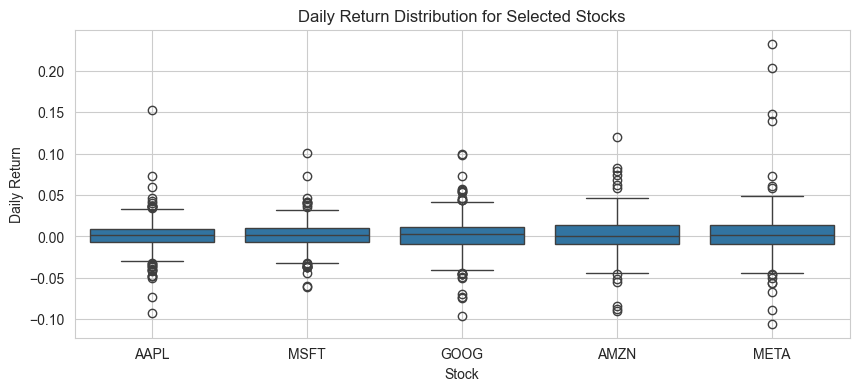

In [10]:
final_df['Daily_Return'] = final_df.groupby('Ticker')['Close'].pct_change()

sample_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']
sample_df = final_df[final_df['Ticker'].isin(sample_tickers)]

plt.figure(figsize=(10,4))
sns.boxplot(data=sample_df, x='Ticker', y='Daily_Return')
plt.title('Daily Return Distribution for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


This boxplot compares the daily returns of selected major companies.  
It helps visualize volatility, risk, and consistency in stock performance.

# AAPL Volume Traded Over Time

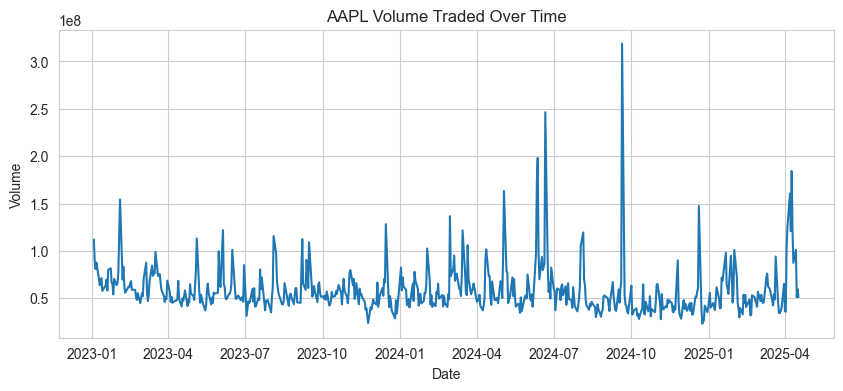

In [11]:
plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Volume'])
plt.title('AAPL Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

This plot tracks the daily trading volume of AAPL stock over time.  
It reflects investor activity and liquidity in the market.


## Correlation Heatmap of Technical Indicators (AAPL)

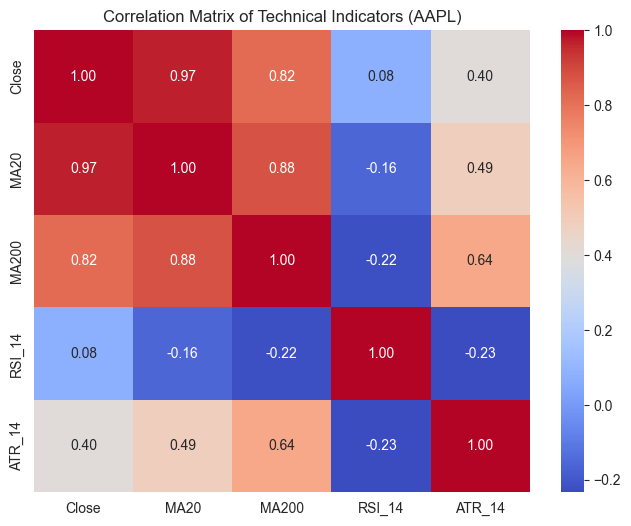

In [12]:
aapl_df = final_df[final_df['Ticker'] == 'AAPL']
features = ['Close', 'MA20', 'MA200', 'RSI_14', 'ATR_14']
correlation_matrix = aapl_df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Technical Indicators (AAPL)')
plt.show()


This heatmap shows the correlation between key technical indicators for AAPL.  
It helps identify relationships between indicators such as Moving Averages (MA20/MA200), RSI, ATR, and the stock's close price.  
For example, we expect MA20 and MA200 to be highly correlated with the closing price, while ATR and RSI capture different aspects like volatility and momentum.

## Top 10 Companies by Market Capitalization

C:\Users\yogev\AppData\Local\Temp\ipykernel_11428\31889256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')


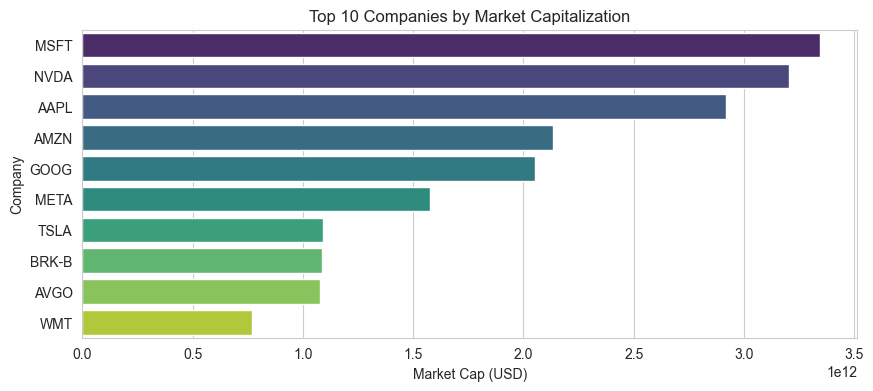

In [13]:
sorted_df = final_df.sort_values(by='Date', ascending=False)
latest_market_cap = sorted_df.drop_duplicates(subset='Ticker')[['Ticker', 'Market_Cap']]
top10 = latest_market_cap.sort_values(by='Market_Cap', ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Company')
plt.show()


This bar chart displays the ten largest companies in our dataset by market capitalization.  
It gives a sense of the relative size of each company in the stock market and shows how the dataset includes both large-cap and mid-cap stocks.

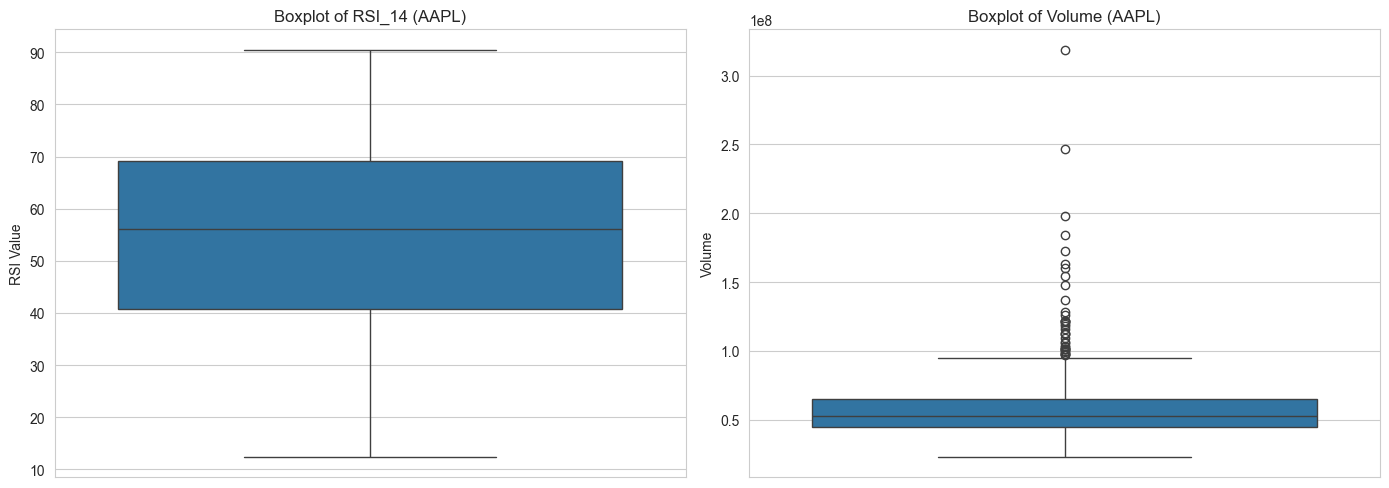

In [14]:
# Filter a specific stock to focus on (e.g., AAPL)
aapl_df = final_df[final_df['Ticker'] == 'AAPL'].dropna(subset=['RSI_14', 'Volume'])

# Plot boxplots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=aapl_df['RSI_14'])
plt.title('Boxplot of RSI_14 (AAPL)')
plt.ylabel('RSI Value')

plt.subplot(1, 2, 2)
sns.boxplot(y=aapl_df['Volume'])
plt.title('Boxplot of Volume (AAPL)')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


## Stage 2

In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Filter numeric features only
# numeric_df = final_df.select_dtypes(include='number').dropna()

# numeric_df = final_df.groupby('Ticker').mean(numeric_only=True).sort_values(by="Ticker")

# # Scatter plots of all feature pairs
# sns.pairplot(numeric_df)
# plt.suptitle('Pairwise Scatter Plots of Numeric Features', y=1.02)
# plt.show()


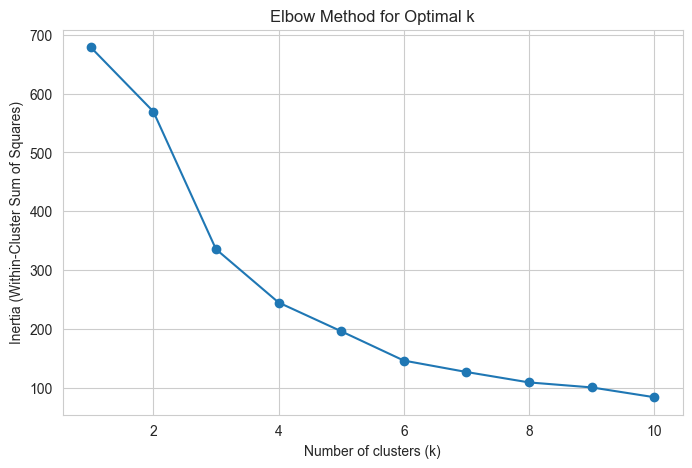

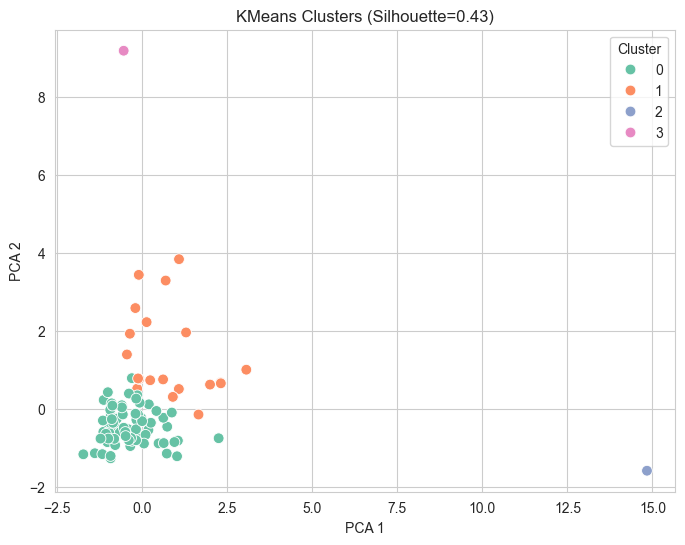

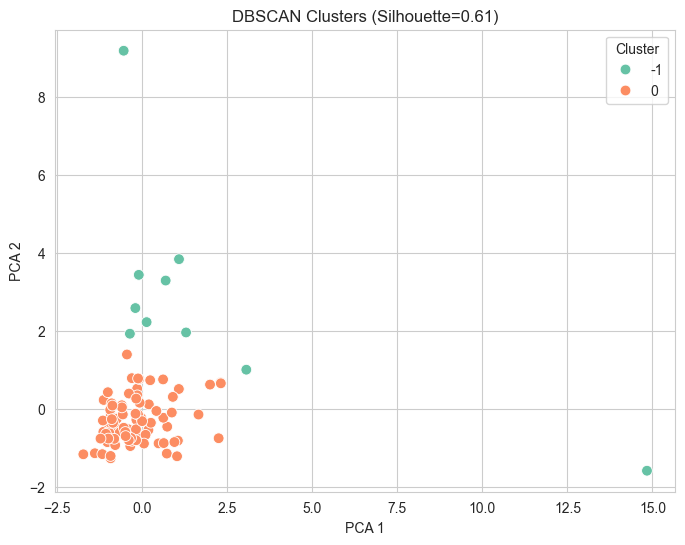

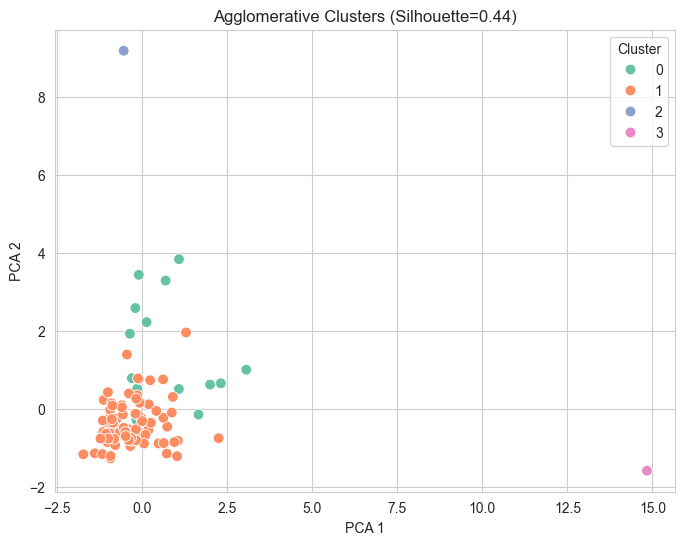

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['Ticker', 'RSI_14', 'ATR_14', 'P/E', 'MA20', 'MA200', 'Volume', 'Market_Cap']
df_selected = final_df[selected_columns]

# Step 2: Group by Ticker and aggregate
final_df = df_selected.groupby('Ticker').agg({
    'RSI_14': 'mean',
    'ATR_14': 'mean',
    'P/E': 'mean',
    'MA20': 'mean',
    'MA200': 'mean',
    'Volume': 'mean',
    'Market_Cap': 'mean'
}).dropna()  # Drop tickers with missing P/E

# ------------------ Preprocessing ------------------
# Assuming final_df already exists
X = final_df.copy()
X = final_df.reset_index(drop=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# ------------------ KMeans Clustering ------------------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)

# ------------------ DBSCAN Clustering ------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
sil_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# ------------------ Agglomerative Clustering ------------------
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)
sil_agglo = silhouette_score(X_scaled, agglo_labels)

# ------------------ PCA for 2D Projection ------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ------------------ Plot Results ------------------
def plot_clusters(labels, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=60)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.show()

plot_clusters(kmeans_labels, f'KMeans Clusters (Silhouette={sil_kmeans:.2f})')
plot_clusters(dbscan_labels, f'DBSCAN Clusters (Silhouette={sil_dbscan:.2f})')
plot_clusters(agglo_labels, f'Agglomerative Clusters (Silhouette={sil_agglo:.2f})')


## Step 3: Time Series Forecasting – Predicting MSFT Close Price


In [17]:
df = pd.read_csv('stocks_data_full_new.csv')

# Prepare MSFT data
df_msft = df[df['Ticker'] == 'MSFT'].copy()
df_msft['Date'] = pd.to_datetime(df_msft['Date'])
df_msft.sort_values('Date', inplace=True)
df_msft.set_index('Date', inplace=True)

df_msft.head()

,Open,High,Low,Close,Volume,Ticker,ATR_14,RSI_14,P/E,Market_Cap,MA20,MA200,Sector
Date,,,,,,,,,,,,,
2023-01-03,238.239,240.856,232.672,234.809,25740000,MSFT,6.304,44.730,38.01,3650046132224,239.551,254.486,Technology
2023-01-04,227.654,228.233,221.460,224.538,50623400,MSFT,7.244,28.601,38.01,3650046132224,238.517,254.147,Technology
2023-01-05,222.675,223.019,217.344,217.883,39585600,MSFT,7.237,22.528,38.01,3650046132224,237.399,253.781,Technology
2023-01-06,218.559,221.264,214.982,220.451,43613600,MSFT,7.110,29.219,38.01,3650046132224,236.446,253.404,Technology
2023-01-09,221.940,226.635,221.901,222.597,27369800,MSFT,6.986,34.662,38.01,3650046132224,235.452,253.060,Technology


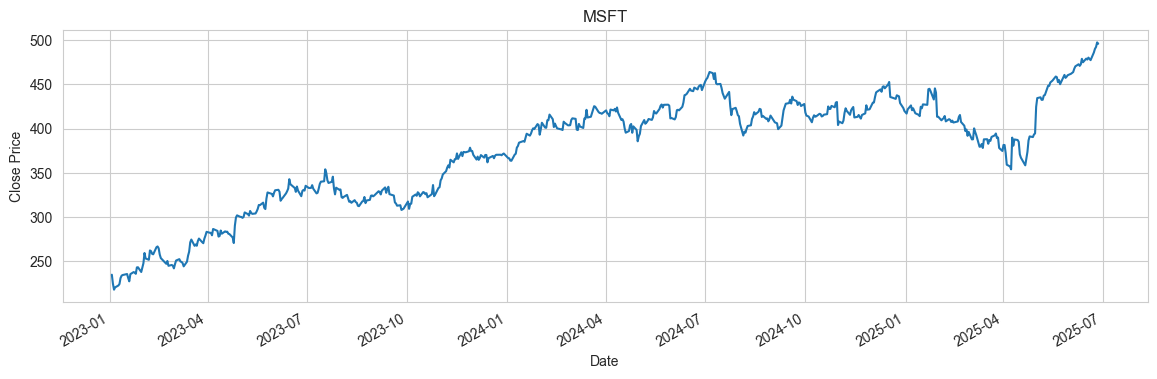

In [18]:
plt.figure(figsize=(14, 4))
df_msft["Close"].plot(title="MSFT")
plt.ylabel("Close Price")
plt.show()

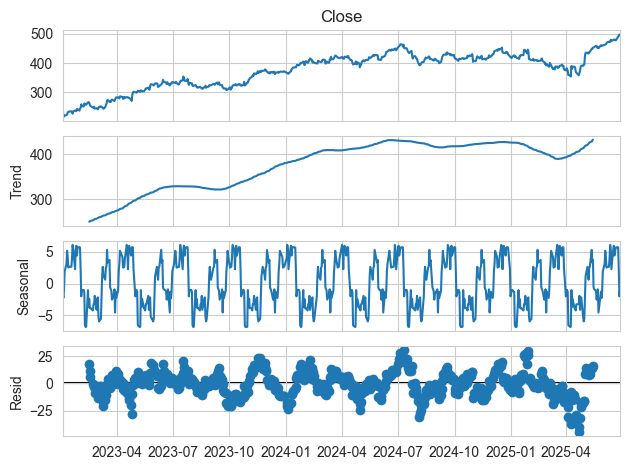

In [19]:
decomp = seasonal_decompose(df_msft["Close"], model="additive", period=60)
decomp.plot()
plt.tight_layout()
plt.show()

In [20]:
result = adfuller(df_msft["Close"])
print(f"ADF Statistic: {result[0]:.2f}")
print(f"p-value: {result[1]:.4f}")

ADF Statistic: -1.38
p-value: 0.5917


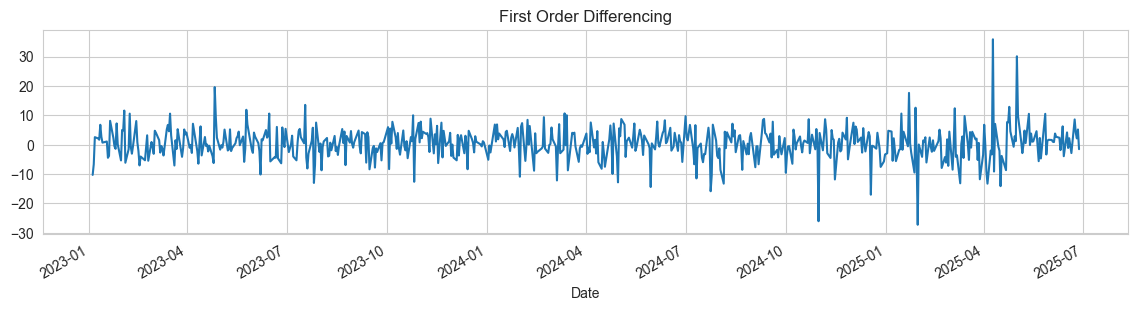

In [21]:
df_msft["diff1"] = df_msft["Close"].diff().dropna()
df_msft["diff1"].plot(figsize=(14, 3), title="First Order Differencing")
plt.show()

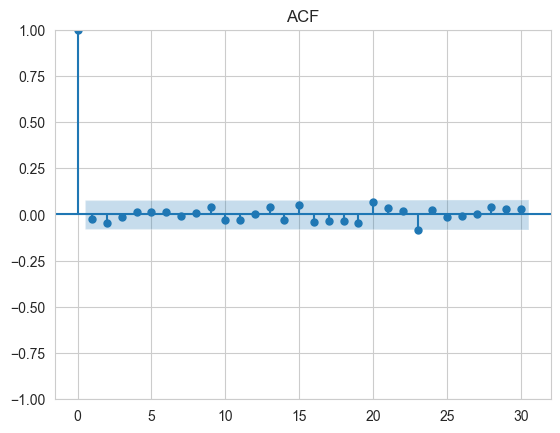

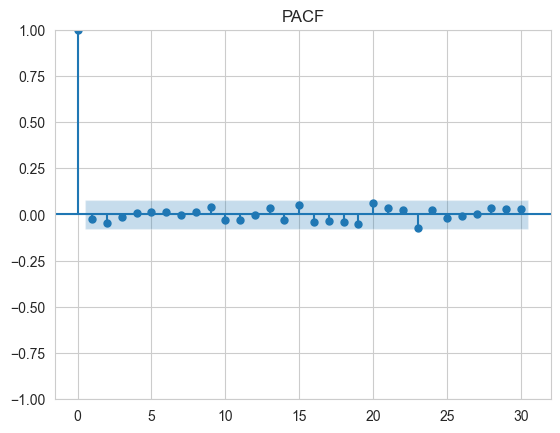

In [22]:
plot_acf(df_msft["diff1"].dropna(), lags=30)
plt.title("ACF")
plt.show()

plot_pacf(df_msft["diff1"].dropna(), lags=30)
plt.title("PACF")
plt.show()

In [23]:
model = SARIMAX(df_msft["Close"], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 60))
fit = model.fit(disp=False)
print(fit.summary())

c:\Users\yogev\OneDrive\שולחן העבודה\Stocks-Project\project_venc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yogev\OneDrive\שולחן העבודה\Stocks-Project\project_venc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  623
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 60)   Log Likelihood               -1820.243
Date:                            Mon, 07 Jul 2025   AIC                           3648.487
Time:                                    12:54:38   BIC                           3665.813
Sample:                                         0   HQIC                          3655.251
                                            - 623                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9275      0.096     -9.657      0.000      -1.116      -0.739
ma.L1          0.9509      0.084   

c:\Users\yogev\OneDrive\שולחן העבודה\Stocks-Project\project_venc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yogev\OneDrive\שולחן העבודה\Stocks-Project\project_venc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


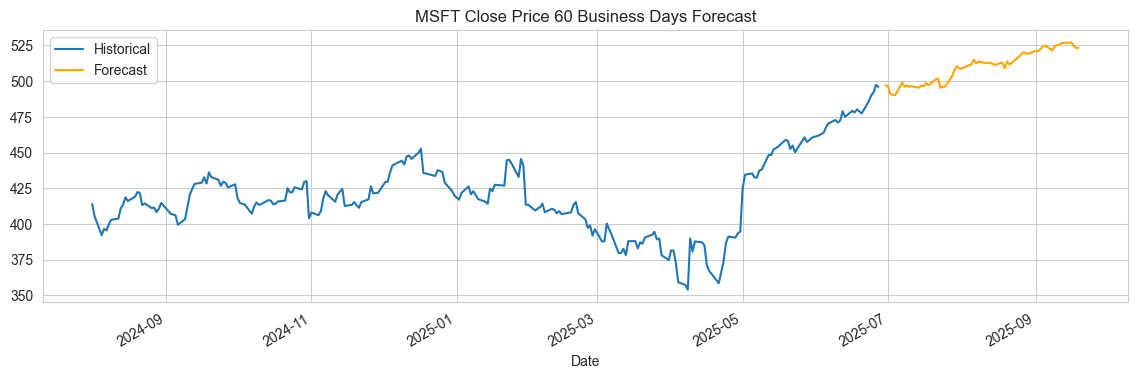

In [24]:
# תחזית ל-60 ימי מסחר קדימה
forecast = fit.forecast(steps=60)

# אינדקס תחזית - ימי מסחר בלבד
forecast_index = pd.bdate_range(start=df_msft.index[-1] + pd.Timedelta(days=1), periods=60)

# בניית סדרה
forecast_series = pd.Series(forecast.values, index=forecast_index)

# סינון הנתונים מהתחלת 2025
df_2024 = df_msft[df_msft.index >= "2024-08-01"]

# ציור הגרף
plt.figure(figsize=(14, 4))
df_2024["Close"].plot(label="Historical")
forecast_series.plot(label="Forecast", color="orange")
plt.title("MSFT Close Price 60 Business Days Forecast")
plt.legend()
plt.show()

#### Model Performance Metrics


In [25]:
true_vals = df_msft["Close"].iloc[-60:]

# הפק תחזית עבור אותם הימים
pred_vals = fit.get_prediction(start=true_vals.index[0], end=true_vals.index[-1]).predicted_mean

# חישוב RMSE ידני
mse = mean_squared_error(true_vals, pred_vals)
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(true_vals, pred_vals)

# הדפסת התוצאות
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 7.96
MAE: 5.26
